# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
df = pd.read_csv('Desktop/EDA_human_temperature/data/human_body_temperature.csv')

 Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>

The distribution of the parent sample is roughly normal. There is no skew in the distribution and doesn't contain significant outliers. I use a distplot from seaborn or a quartile quartile plot from statsmodels to easily identify, graphically, whether or not the distribution is normal. Other methods used that are non graphically is Shapiro-Wilk test, showing that it comes from a normally distributed parent, and the scipy.stats normal test. Each delivers the test statistic and p-value used to reject or fail to reject the null hypothesis. The null hyptohesis was that the sample was normally distributed.

In [2]:
xbar_sample = df.temperature.mean()
std_sample = df.temperature.std()

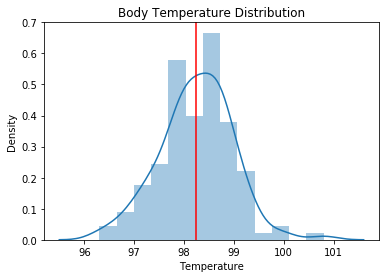

In [3]:
# distribution plot from seaborn shows kernal density and histogram together, mean is shown with red vertical line
sns.distplot(df.temperature, hist = True, kde = True)
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.title('Body Temperature Distribution')
plt.axvline(xbar_sample, color='r')

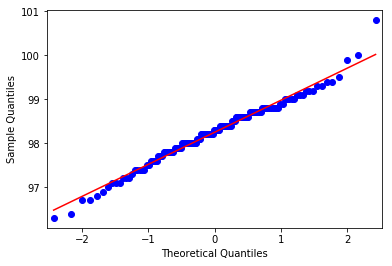

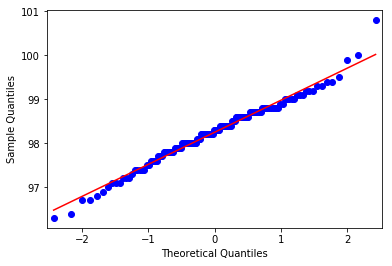

In [4]:
# quantile quantile plot from stats models, confirms this sample is a normally distributed
# also shows there are few outliers 
qqplot(df.temperature, line = 's')

In [5]:
# non-graphical method to identify if this sample derived from a normal distribution Shapiro-Wilk Test
# p-value states that the data does derive from a parent normal distribution 0.2
test_statistic, p_value = stats.shapiro(df.temperature)
print(test_statistic, p_value)

0.9865769743919373 0.2331680953502655


In [6]:
# non-graphical method to identify if this specific sample is normally distributed. 
# p-value confirms that it is in fact a normal distribution
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

<ul>  
  Is the sample size large? Are the observations independent?
<li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
</ul>

The sample size 130 values of temperature is reasonably large(>30), enough to depend on the Central Limit Theorem to approximate. There is no need to do a bootstrapping method due to the size of the sample. The observations are independent assuming, that this sample size is less than 10%. It does meet all three conditions for the Central Limit Theorem, 1. Randomness, 2. Normality, 3. Independence.

 <ul>
 Is the true population mean really 98.6 degrees F?
 
<li> First, try a bootstrap hypothesis test.
<li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
<li> In this situation, is it appropriate to use the $t$ or $z$ statistic?     <li> Now try using the other test. How is the result be different? Why?
</ul>

The true population mean is not 98.6 degrees F. Following the bootstrap simulation, a distribution plot was created and it was identified that 98.6 lies far outside of the confidence interval. Just looking at the graphical representation,  there's less than 0.15% probability that 98.6 is the mean temperature for a human. 0.15% is far below the significance level of 5%.

I would you use a one-sample frequentist statistical test to test my hypothesis because there is a set of data being compared to one value. There is no comparison or relationship to other variables in this particular instance.

A z statistic or t statistic can be used in this case because the sample size is reasonably large enough. A t statistic can be used when using standard error of the sample considering the population standard deviation is unknown.  If a z statistic was used, the standard deviation of the sample can be used to calculate the z score value. 
The results are the same. A pvalue calculated from the z statistic and t statistic is considerably below zero. This falls under our significance level and therefore causes a rejection of the null hypothesis suggesting that the mean body temperature is not 98.6 degrees F. Both suggest that 98.6 degrees F lies over 4 standard deviations away from the sample mean of 98.2.

In [7]:
# H0: mean body temperature is equal to 98.6      - mu == 98.6 degrees F
# Ha: mean body temperature is not equal to 98.6  - mu != 98.6 degrees F
# alpha: significance level = 0.05

In [8]:
# bootstrap hypothesis test with replacement 
def bootstrap(data, n, trials):
    """calculates the mean for each resample"""
    np.random.seed(13)
    resamples = [np.random.choice(data, size = n).mean() for _ in range(trials)]
    resamples.sort()
    return resamples

In [9]:
# bootstrap simulation with n = 130 for 10,000 trials mean of each resampling.
resample_means = bootstrap(df.temperature, df.temperature.shape, 10_000)

In [10]:
xbar_resample_means = np.mean(resample_means)
s_resample_means = np.std(resample_means)
one_std_positive = xbar_resample_means + s_resample_means
one_std_negative = xbar_resample_means - s_resample_means
two_std_positive = xbar_resample_means + s_resample_means * 2
two_std_negative = xbar_resample_means - s_resample_means * 2
three_std_positive = xbar_resample_means + s_resample_means * 3
three_std_negative = xbar_resample_means - s_resample_means * 3

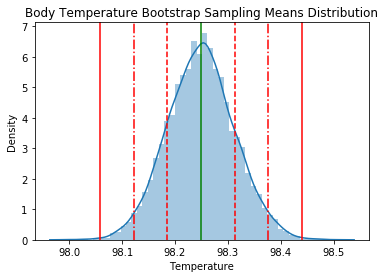

In [11]:
# checking distibution
sns.distplot(resample_means, hist = True, kde = True)
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.title('Body Temperature Bootstrap Sampling Means Distribution')
plt.axvline(xbar_resample_means, color='g')
plt.axvline(one_std_positive, color='r', linestyle='--')
plt.axvline(one_std_negative, color='r', linestyle='--')
plt.axvline(two_std_positive, color='r', linestyle='-.')
plt.axvline(two_std_negative, color='r', linestyle='-.')
plt.axvline(three_std_positive, color='r', linestyle='-')
plt.axvline(three_std_negative, color='r', linestyle='-')

In [12]:
# 95% confidence interval 96.8 is significantly outside of this interval
np.percentile(resample_means, [2.5, 97.5])
# [98.12538462, 98.37538462]

array([98.12538462, 98.37538462])

In [13]:
# 99% confidence interval 96.8 is still significantly outside of this interval
np.percentile(resample_means, [0.1, 99])
# [98.05230692, 98.3977    ]

array([98.05230692, 98.3977    ])

Frequentist Statistical Testing

In [14]:
# mean of sample xbar_not = 98.24923076923078
# standard deviation of sample is std_sample = 0.7303577789050377
# standard error of sample SE = 0.06405661
SE = np.std(df.temperature) / np.sqrt(df.temperature.shape)

# 95% confidence interval z score value = 1.96

# degrees of freedom = 129
# two-tail t-score value = +/- 1.9785

In [15]:
# two sided z score test
def z_score(xbar, mu_not, standard_deviation, n):
    """calculates value to be used with z"""
    numerator = xbar - mu_not
    return numerator / (standard_deviation / np.sqrt(n))

z_score = z_score(xbar_sample, 98.6, std_sample, 130)
# z_score = -5.454823292364079
z_score
# right away we know this value is over five standard deviations 
# from the mean and therefore is not an accurate mean body temperature

-5.454823292364079

In [16]:
# calculating p-value with the z score
zp_value =  stats.norm.cdf(z_score)
zp_value
# 0.00000002% chance that 98.6 could be the mean body temperature
#zp-value = 2.45107850705669e-08 far lower than the significance level

2.45107850705669e-08

T-score values

In [17]:
# 95% confidence interval from t score value
lower = xbar_sample - 1.9785 * (SE) 
upper = xbar_sample + 1.9785 * (SE) 
print(lower, upper)
# [98.12249476, 98.37596678]

[98.12249476] [98.37596678]


In [18]:
# two sided t score test
def t_score(xbar, mu_not, standard_error):
    """calculates value to be used with t"""
    numerator = xbar - mu_not
    return numerator / standard_error

t_score = t_score(xbar_sample, 98.6, SE)

In [19]:
# p-value calculated with t score value
t_pvalue = stats.t.cdf(t_score, 129) 
t_pvalue
# 0.00000001% chance 98.6 degrees F is the mean body temperature
# t_pvalue = 1.09437323e-07 far lower than the significance level

array([1.09437323e-07])

In [20]:
# checking answer
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

 </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>

The correct test statistic to use is the t-score value because the size is less than 30 and the population standard deviation is unknown. Because a condition was not meant to use the z-score value, a type II error occured because the p-value of 44% was greater than our significance level of 5%. 
Using the z-statistic when conditions are not met could cause errors in hypothesis testing, therfore it is important to use the appropriate statistic to avoid errors.

In [21]:
# mean of sample xbar_ten_value_draw = 98.03
# standard deviation of sample is std_ten_sample_draw = 0.4450842616853581
# standard error of sample se_ten_sample_draw = 0.14074800176201446

# 95% confidence interval z score value = 1.96

# degrees of freedom = 9
# two-tail t-score value = +/- 2.2622


In [22]:
# draw of 10 temperatures from sample [t-distribution]
np.random.seed(1300)
ten_value_draw = np.random.choice(df.temperature, 10)

In [23]:
# mean of ten values drawn 
xbar_ten_value_draw = np.mean(ten_value_draw)
# standard error of ten values drawn 
std_ten_value_draw = np.std(ten_value_draw)
se_ten_value_draw = std_ten_value_draw / np.sqrt(9)

In [24]:
# mean and standard error of values drawn from first sample
xbar_ten_value_draw, std_ten_value_draw, se_ten_value_draw

(98.03, 0.4450842616853581, 0.14836142056178603)

In [25]:
# 95% confidence interval 
np.percentile(ten_value_draw, [2.5, 97.5])
# [97.1675, 98.555]

array([97.1675, 98.555 ])

In [26]:
#  z score test
ten_zscore = (xbar_ten_value_draw - 98.6) / std_sample 
ten_zscore
# z-score = -1.0846143582199361
# from z table value is 0.2206

-0.7774319332765085

In [27]:
# calculated p-value for the ten draw sample
ten_z_pvalue = .2206 * 2
ten_z_pvalue
# 0.4412 > 0.05 therefore null hypothesis failed to be rejected (Type II error)

0.4412

T-score Value

In [28]:
# 95% confidence interval from t score value
ten_lower = xbar_ten_value_draw - 2.2622 * (se_ten_value_draw)
ten_upper = xbar_ten_value_draw + 2.2622 * (se_ten_value_draw) 
print(ten_lower, ten_upper)
# [97.69437679440513 98.36562320559487]

97.69437679440513 98.36562320559487


In [29]:
# two sided t score test
def t_score(xbar, mu_not, standard_error):
    """calculates value to be used with t"""
    numerator = xbar - mu_not
    return numerator / standard_error

ten_t_score = t_score(xbar_ten_value_draw, 98.6, se_ten_value_draw)
ten_t_score

-3.8419691442804242

In [52]:
# p-value calculated with t score value
t_pvalue = stats.t.cdf(ten_t_score, 9) * 2
t_pvalue
# 0.003954594338832503 < 0.05 therefore we reject the null hypothesis

0.003954594338832503

In [30]:
# checking answer
stats.ttest_1samp(ten_value_draw, 98.6)

Ttest_1sampResult(statistic=-3.8419691442804242, pvalue=0.003954594338832503)

</ul>
 At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>

In terms of an abnormal temperature, one can choose a confidence interval and identify those temperatures outside of that level. Looking at the distribution of the bootstrap method used to generate 10,000 trials with a sample size of 130, one can use the empirical rule and estimate. Also, I can say that with a 95% confidence, the values that exist outside of the range of 98.12 and 98.4 are abnormal. The likelyhood of a temperature outside of this range is abnormal because of the increased distance, standard deviation, from the mean. These values have a margin of error of one percent.If you wanted to be even more certain, a 99.7% confidence interval would increase the range within "normal temperatures" and use 98.06 and 98.44 degrees farenheit as the threshold. Outside of this range it is even farther from the mean and  standard deviation and therefore the likelyhood is far less. There is a 1.5% margin of error.

The given data sample, at a 95% confidence interval has a larger margin of error of 13% within the range of 98.13 and 98.38. There isn't much difference in the intervals but the margin of error has changed significantly due to the increase in variance. Afterall, the bootstrap method used the means of the simulated samples not the actual values. Nevertheless, using the empirical rule with consideration of the margin of error, I would use a 99% confidence interval to conclude that the values outside of the range of 98.06 and 98.44 can be considered abnormal due to their distance away from the sample mean. 

In [31]:
# boostrap used to generate sample means of n = 130 to identify abnormal temperature
np.random.seed(13)
replicate_resample = [np.random.choice(df.temperature, size = 130).mean() for _ in range(10_000)]


In [32]:
ninety_five_percent = np.percentile(replicate_resample, [2.5, 97.5])
# 95% condfidence interval [98.12538462, 98.37538462] 
ninety_nine_seven = np.percentile(replicate_resample, [0.15, 99.85])
# 99% confidence interval [98.06076692, 98.44077731]

In [33]:
# margin of error 95%
# Margin of error = Critical value x Standard error 
bootstrap_margin_error95 = 1.96 * (np.std(replicate_resample) / np.sqrt(130))

In [34]:
# margin of error 99.7%
# Margin of error = Critical value x Standard error 
bootstrap_margin_error99 = 2.576 * (np.std(replicate_resample) / np.sqrt(130))

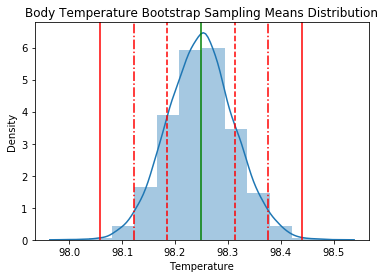

In [35]:
# analyzing abnormal temperatures graphically 
sns.distplot(replicate_resample, hist = True, bins = 12, kde = True)
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.title('Body Temperature Bootstrap Sampling Means Distribution')
plt.axvline(xbar_resample_means, color='g')
plt.axvline(one_std_positive, color='r', linestyle='--')
plt.axvline(one_std_negative, color='r', linestyle='--')
plt.axvline(two_std_positive, color='r', linestyle='-.')
plt.axvline(two_std_negative, color='r', linestyle='-.')
plt.axvline(three_std_positive, color='r', linestyle='-')
plt.axvline(three_std_negative, color='r', linestyle='-')

Frequentist Statistical Testing

In [36]:
sample_confidence_interval95 = np.percentile(df.temperature, [2.5, 97.5])
# 95% condfidence interval [96.7225, 99.4775]
sample_confidence_interval99 = np.percentile(replicate_resample, [0.15, 99.85])
# 99.7% confidence interval [98.06076692, 98.44077731]

In [37]:
# margin of error 95%
# Margin of error = Critical value x Standard error 
margin_error95 = 1.96 * SE
# margin_error95 = [0.12555096]

In [38]:
# margin of error 99.7%
# Margin of error = Critical value x Standard error 
margin_error99 = 2.576 * SE
#margin_error99 = [0.16500984]

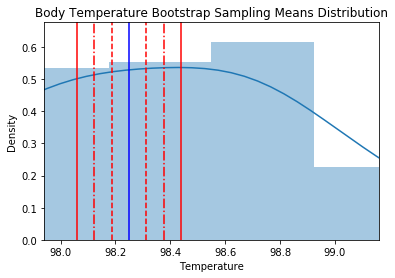

In [46]:
# analyzing abnormal temperatures graphically, zoomed in to view std
sns.distplot(df.temperature, hist = True, bins = 12, kde = True)
plt.margins(x=-0.4, y=0.1)
plt.xlabel('Temperature')
plt.ylabel('Density')
plt.title('Body Temperature Bootstrap Sampling Means Distribution')
plt.axvline(xbar_resample_means, color='b')
plt.axvline(one_std_positive, color='r', linestyle='--')
plt.axvline(one_std_negative, color='r', linestyle='--')
plt.axvline(two_std_positive, color='r', linestyle='-.')
plt.axvline(two_std_negative, color='r', linestyle='-.')
plt.axvline(three_std_positive, color='r', linestyle='-')
plt.axvline(three_std_negative, color='r', linestyle='-')


In [52]:
# tester used to calculate the pvalue of given intervals
tester = stats.ttest_1samp(df.temperature, 98.4)
tester

Ttest_1sampResult(statistic=-2.3446170291745276, pvalue=0.02057341719522308)

<ul>
<li>Is there a significant difference between males and females in normal temperature?

<li> What testing approach did you use and why?
<li> Write a story with your conclusion in the context of the original problem.
</ul>


The p-value calculated with a z-statistic and t-statistic were both around 2.25% which means our null hypothesis must be rejected. There is a significant difference in the mean temperatures of males and females. A z or t test were both applicable in this case due to the sample size but if it were not for an assignment I would have used stats.ttest_ind to quickly and accurately calculate a p-value to compare to the significance level. I have found the methods that I would like to use during this assignment.

A story regarding this case consists of calculating the difference of the means. This difference between the means can also be considered a mean of the differences between male and female temperatures. In order to find these means the data had to be located in the data frame and seperated for calculations. A difference in mean of zero would indicate that there is no difference at all in the mean temperatures and alternatively, a large difference would indicate a difference in mean temperatures, hence the hypotheses. The confidence interval established consisted of the values of means that were 95% likely to occur. because the mean difference fell outside this 95% interval and had only a 2.5% probability, the null hypothesis was rejected. A value occuring almost a distance 2.85 standard deviations from the mean is unlikely.

In [ ]:
#H0: there is no difference in normal temperature mean difference == 0
#Ha: there is a difference in normal temperature mean differrence != 0
#alpha significance level = 0.05

In [57]:
# dataframe of males
males = df.loc[df['gender'] == 'M']
# 65 observations

In [59]:
# dataframe of females
females = df.loc[df['gender'] == 'F']
# 65 observations

In [84]:
male_mean = males.temperature.mean()
# male_mean =  98.1046153846154
male_variance = np.var(males.temperature) / 65
# male_variance = 0.4807479289940825

In [85]:
female_mean = females.temperature.mean()
# female_mean = 98.39384615384613
female_variance = np.var(females.temperature) / 65
# female_variance = 0.007396121984524346

In [86]:
# The difference of the means, also the mean of the difference
mean_difference = np.abs(male_mean - female_mean)
# mean_difference = 0.008373381884387788

In [91]:
# standard deviation of the two samples combined
std_gender = np.sqrt( male_variance + female_variance)
# std_gender = 0.12557668521231213

In [113]:
# 95% confidence interval z-table critical z-value = 1.96
gender_lower_margin = -1.96 * (std_gender / 65)
gender_upper_margin = 1.96 * (std_gender / 65)
# apply margin of error to the mean of difference
gender_lower = std_gender + gender_lower_margin
gender_upper = std_gender + gender_upper_margin
print(gender_lower, gender_upper)

0.12179006516591011 0.12936330525871417


In [111]:
# two tail test
gender_pvalue = (1 - stats.norm.cdf(2.2307)) * 2
# gender_pvalue = 0.025701007644235885

In [114]:
# I was interested in what the t-test would indicate
stats.ttest_ind(females.temperature, males.temperature)
# ttest pvalue=0.02393188312239561

Ttest_indResult(statistic=2.2854345381656103, pvalue=0.02393188312239561)